In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
from pathlib import Path


In [2]:
print(insightface.__version__)

0.7.3


# Example

In [3]:
app = FaceAnalysis(name='buffalo_l')
app.prepare(ctx_id=0,det_size=(640, 640))

C:\Users\Sasha\AppData\Roaming\Python\Python311\site-packages\onnxruntime\capi\onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sasha/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sasha/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sasha/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sasha/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\Sasha/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

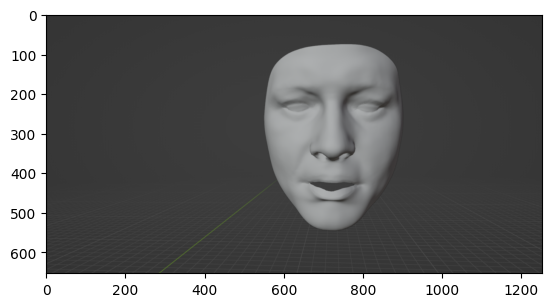

In [4]:
DUMMY_PATH = Path("./dummies/G_dummy.png")
dummy=cv2.imread(str(DUMMY_PATH))
plt.imshow(dummy[:,:,::-1])

In [5]:
dummy_face =app.get(dummy)

C:\Users\Sasha\anaconda3\envs\LFF\Lib\site-packages\insightface\utils\transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


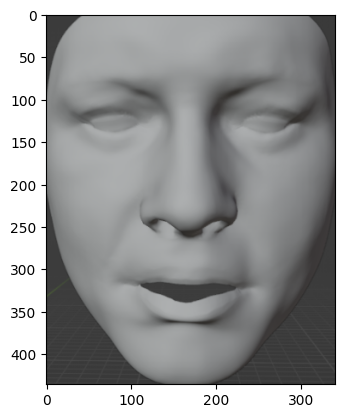

In [6]:
bbox= dummy_face[0]['bbox']
bbox= [int(b) for b in bbox]
plt.imshow(dummy[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])

d=dummy_face[0]

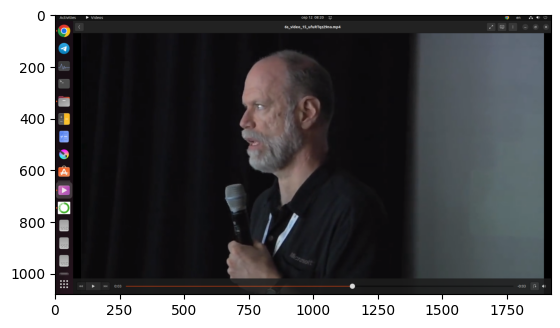

In [7]:
INPUT_PATH=Path('./input/15.png')
source=cv2.imread(str(INPUT_PATH))
plt.imshow(source[:,:,::-1])

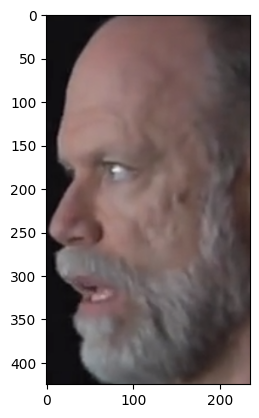

In [8]:
source_face =app.get(source)

bbox= source_face[0]['bbox']
bbox= [int(b) for b in bbox]
plt.imshow(source[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])

s=source_face[0]

In [9]:
print("Number of faces in the image:",len(source_face))

Number of faces in the image: 1


In [10]:
swapper=insightface.model_zoo.get_model('inswapper_128',download=False,download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


In [11]:
res=dummy.copy()

res=swapper.get(res,d,s)

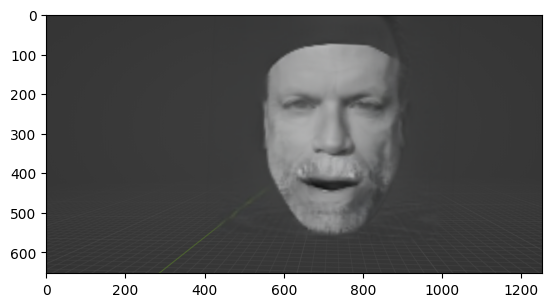

In [12]:
plt.imshow(res[:,:,::-1])
plt.show()

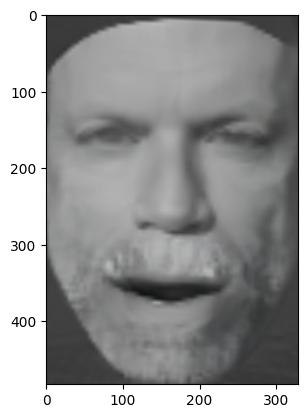

In [13]:
res_face =app.get(res)

bbox= res_face[0]['bbox']
bbox= [int(b) for b in bbox]
plt.imshow(res[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])

plt.show()